In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sleep_prod = pd.read_csv('sleep.csv') 
sleep_prod['average_prod'] = (sleep_prod['Productivity_HW']+sleep_prod['Productivity_PER'])/2
sleep_prod = sleep_prod[sleep_prod.Productivity_HW != 0].reset_index(drop=True)
sleep_prod

# sleep_prod.loc[(sleep_prod!=0).any(axis=1)]
# sleep_prod = sleep_prod[sleep_prod.line_race != 0]

,unit,na_item,geo\time,Country,Hours,Productivity_HW,Productivity_PER,average_prod
0,PC_EU27_2020_MPPS_CP,NLPR_HW,AT,Austria,7.183,117.4,114.5,115.95
1,PC_EU27_2020_MPPS_CP,NLPR_HW,BE,Belgium,7.300,137.9,129.0,133.45
2,PC_EU27_2020_MPPS_CP,NLPR_HW,BG,Bulgaria,7.150,48.8,50.8,49.80
3,PC_EU27_2020_MPPS_CP,NLPR_HW,HR,Croatia,7.233,60.2,71.6,65.90
4,PC_EU27_2020_MPPS_CP,NLPR_HW,CZ,Czechia,7.183,77.7,85.9,81.80
5,PC_EU27_2020_MPPS_CP,NLPR_HW,DK,Denmark,7.250,139.4,121.3,130.35
6,PC_EU27_2020_MPPS_CP,NLPR_HW,EE,Estonia,7.367,72.5,80.8,76.65
7,PC_EU27_2020_MPPS_CP,NLPR_HW,FI,Finland,7.500,108.0,110.6,109.30
8,PC_EU27_2020_MPPS_CP,NLPR_HW,FR,France (including Monaco),7.383,126.5,115.5,121.00
9,PC_EU27_2020_MPPS_CP,NLPR_HW,DE,Germany,7.233,121.9,104.6,113.25


In [4]:
len(sleep_prod)

30

In [5]:
import matplotlib.pyplot as plt

x=sleep_prod['Hours'].values
y=sleep_prod['Productivity_HW'].values

x = x.reshape(len(sleep_prod), 1)
y = y.reshape(len(sleep_prod), 1)

<AxesSubplot:>

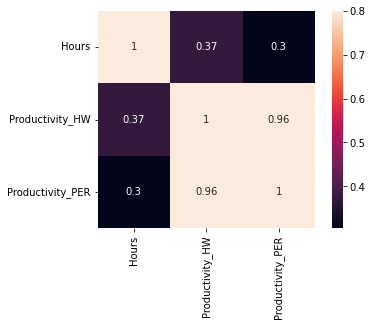

In [16]:
import seaborn as sb
sleep_corr = pd.DataFrame(sleep_prod['Hours'])
sleep_corr['Productivity_HW'] = sleep_prod['Productivity_HW']
sleep_corr['Productivity_PER'] = sleep_prod['Productivity_PER']
sb.heatmap(abs(sleep_corr.corr()), vmax = .8, square = True, annot = True)


In [13]:
%matplotlib inline

0.1185164825872218


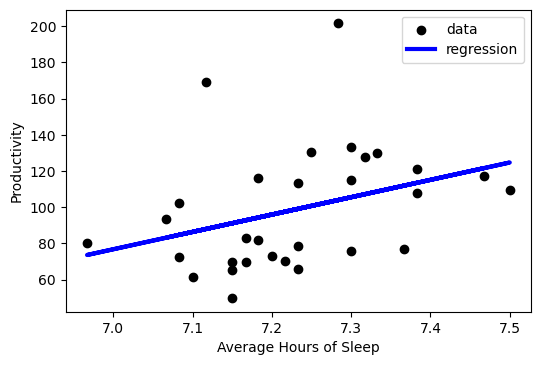

In [7]:

x=sleep_prod['Hours'].values
y=sleep_prod['average_prod'].values

x = x.reshape(len(sleep_prod), 1)
y = y.reshape(len(sleep_prod), 1)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))


fig, ax = plt.subplots(dpi=100, figsize=(6, 4))
fig.patch.set_facecolor('white')
ax.scatter(x, y,  color='black', label='data')
ax.plot(x, regr.predict(x), color='blue', linewidth=3, label='regression')

ax.set_xlabel('Average Hours of Sleep', fontsize=10)
ax.set_ylabel("Productivity", fontsize=10)

ax.legend()
plt.show()

In [6]:
sleep_prod = sleep_prod.set_index('Country')
sleep_prod

,unit,na_item,geo\time,Hours,Productivity_HW,Productivity_PER,average_prod
Country,,,,,,,
Austria,PC_EU27_2020_MPPS_CP,NLPR_HW,AT,7.183,117.4,114.5,115.95
Belgium,PC_EU27_2020_MPPS_CP,NLPR_HW,BE,7.300,137.9,129.0,133.45
Bulgaria,PC_EU27_2020_MPPS_CP,NLPR_HW,BG,7.150,48.8,50.8,49.80
Croatia,PC_EU27_2020_MPPS_CP,NLPR_HW,HR,7.233,60.2,71.6,65.90
Czechia,PC_EU27_2020_MPPS_CP,NLPR_HW,CZ,7.183,77.7,85.9,81.80
Denmark,PC_EU27_2020_MPPS_CP,NLPR_HW,DK,7.250,139.4,121.3,130.35
Estonia,PC_EU27_2020_MPPS_CP,NLPR_HW,EE,7.367,72.5,80.8,76.65
Finland,PC_EU27_2020_MPPS_CP,NLPR_HW,FI,7.500,108.0,110.6,109.30
France (including Monaco),PC_EU27_2020_MPPS_CP,NLPR_HW,FR,7.383,126.5,115.5,121.00


In [8]:
df_new = sleep_prod[['Hours']]
df_new


,Hours
Country,
Austria,7.183
Belgium,7.300
Bulgaria,7.150
Croatia,7.233
Czechia,7.183
Denmark,7.250
Estonia,7.367
Finland,7.500
France (including Monaco),7.383


In [10]:
df_new.to_csv('sleep_df.csv', index=True)